<a href="https://colab.research.google.com/github/shivaniuppe/olympic_medals_prediction/blob/main/olympic_medals_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

In this section, we prepare the dataset for machine learning. The raw athlete-level data (athlete_events.csv) is processed to create a team-level dataset (teams.csv). This involves:

Aggregating athlete-level data to team-level statistics.

Handling missing values.

Selecting relevant features for the prediction task.

In [3]:
import pandas as pd

In [4]:
athletes = pd.read_csv('/content/athlete_events.csv')

In [ ]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
athletes = athletes[athletes["Season"] == "Summer"]

In [ ]:
def team_summary(data):
    return pd.Series({
        'team': data.iloc[0,:]["NOC"],
        'country': data.iloc[-1,:]["Team"],
        'year': data.iloc[0,:]["Year"],
        'events': len(data['Event'].unique()),
        'athletes': data.shape[0],
        'age': data["Age"].mean(),
        'height': data['Height'].mean(),
        'weight': data['Weight'].mean(),
        'medals': sum(~pd.isnull(data["Medal"]))
    })

team = athletes.groupby(["NOC", "Year"]).apply(team_summary)

In [ ]:
team = team.reset_index(drop=True)
team = team.dropna()

In [ ]:
team

,team,country,year,events,athletes,age,height,weight,medals
3,AFG,Afghanistan,1960,13,16,23.312500,170.687500,69.437500,0
4,AFG,Afghanistan,1964,8,8,22.000000,161.000000,64.250000,0
5,AFG,Afghanistan,1968,5,5,23.200000,170.200000,70.000000,0
6,AFG,Afghanistan,1972,8,8,29.000000,168.333333,63.750000,0
7,AFG,Afghanistan,1980,11,11,23.636364,168.363636,63.181818,0
...,...,...,...,...,...,...,...,...,...
2805,ZIM,Zimbabwe,2000,19,26,24.961538,178.960000,71.080000,0
2806,ZIM,Zimbabwe,2004,11,14,25.071429,177.785714,70.500000,3
2807,ZIM,Zimbabwe,2008,15,16,26.062500,171.928571,63.714286,4
2808,ZIM,Zimbabwe,2012,8,9,27.333333,174.444444,65.222222,0


In [ ]:
team["medals"] = pd.to_numeric(team["medals"], errors="coerce")

def prev_medals(data):
    data = data.sort_values("year", ascending=True)
    data["prev_medals"] = data["medals"].shift(1)
    data["prev_3_medals"] = data["medals"].rolling(3, closed="left", min_periods=1).mean()

    return data

team = team.groupby(["team"]).apply(prev_medals)

team = team.reset_index(drop=True)
team = team[team["year"] > 1960]
team = team.round(1)

In [ ]:
team[team["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2497,USA,United States,1964,159,492,23.5,177.2,71.8,169,125.0,127.3
2498,USA,United States,1968,167,529,23.5,177.2,72.1,166,169.0,139.0
2499,USA,United States,1972,185,578,23.6,177.6,71.7,171,166.0,153.3
2500,USA,United States,1976,189,554,23.0,177.3,71.0,164,171.0,168.7
2501,USA,United States,1984,217,693,24.6,177.2,71.6,352,164.0,167.0
2502,USA,United States,1988,230,715,25.2,177.1,71.4,207,352.0,229.0
2503,USA,United States,1992,248,734,25.7,177.0,71.9,224,207.0,241.0
2504,USA,United States,1996,263,839,26.4,177.5,73.2,259,224.0,261.0
2505,USA,United States,2000,265,764,26.6,177.3,73.6,242,259.0,230.0
2506,USA,United States,2004,254,726,26.5,177.0,73.6,263,242.0,241.7


In [ ]:
team

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
1,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
2,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
3,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
4,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
5,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2608,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2609,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2610,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2611,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
team.to_csv("teams.csv", index=False)

# **Number of Medals Prediction**

In this section, we build a machine learning model to predict the number of medals a country will win. The steps include:

Splitting the data into training and testing sets.

Training a linear regression model.

Evaluating the model's performance using mean absolute error (MAE).

In [ ]:
import pandas as pd

In [ ]:
teams = pd.read_csv('teams.csv')

In [ ]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [ ]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
teams.select_dtypes(include=['number']).corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


In [ ]:
import seaborn as sns

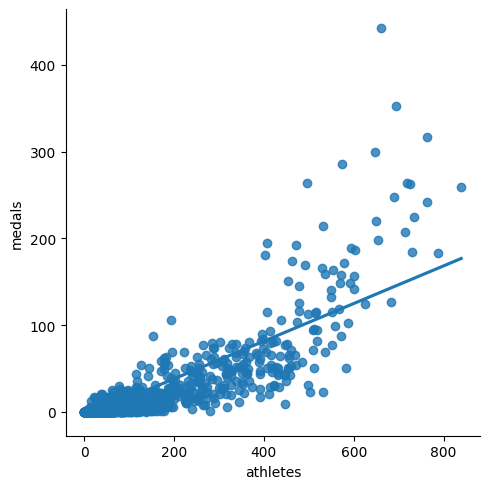

In [ ]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None)

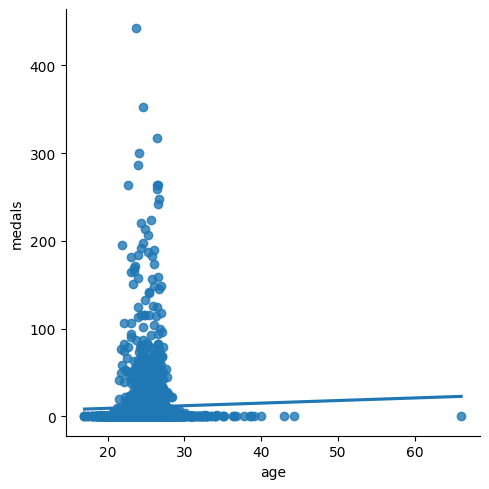

In [ ]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

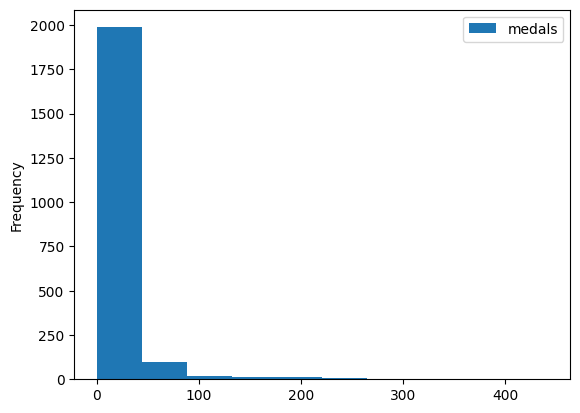

In [ ]:
teams.plot.hist(y="medals")

In [ ]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [ ]:
teams = teams.dropna()

In [ ]:
teams.shape

(2014, 7)

In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [ ]:
# About 80% of the data
train.shape

(1609, 7)

In [ ]:
# About 20% of the data
test.shape

(405, 7)

Accuracy Metric

We'll use mean squared error. This is a good default regression accuracy metric. It's the average of squared differences between the actual results and your predictions.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
predictors = ["athletes", "prev_medals"]

In [ ]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
predictions.shape

(405,)

In [ ]:
test["predictions"] = predictions

In [ ]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [ ]:
test["predictions"] = test["predictions"].round()

In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [ ]:
teams.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [ ]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [ ]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [ ]:
errors = (test["medals"] - predictions).abs()

In [ ]:
errors

,medals
6,1.961221
7,1.176333
24,1.425032
25,1.711847
37,1.155629
...,...
2111,1.926958
2131,1.640143
2132,1.640143
2142,1.505767


In [ ]:
error_by_team = errors.groupby(test["team"]).mean()

In [ ]:
error_by_team

,medals
team,
AFG,1.568777
ALB,1.568439
ALG,1.535133
AND,1.783551
ANG,0.322667
...,...
VIE,1.231905
VIN,1.891106
YEM,1.891106


In [ ]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [ ]:
medals_by_team

,medals
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [ ]:
error_ratio =  error_by_team / medals_by_team

In [ ]:
error_ratio

,medals
team,
AFG,3.137554
ALB,inf
ALG,1.023422
AND,inf
ANG,inf
...,...
VIE,1.231905
VIN,inf
YEM,inf


In [ ]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [ ]:
error_ratio

,medals
team,
AFG,3.137554
ALG,1.023422
ARG,0.841636
ARM,0.433824
AUS,0.362901
...,...
UKR,0.946412
USA,0.128207
UZB,0.658187


<Axes: ylabel='Frequency'>

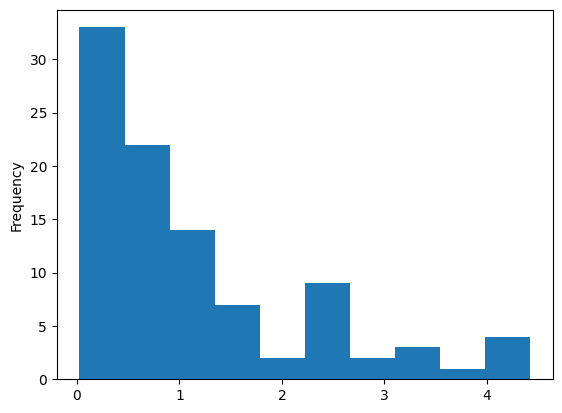

In [ ]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

,medals
team,
FRA,0.024289
CAN,0.050844
NZL,0.071349
RUS,0.081841
ITA,0.119537
...,...
PHI,3.563248
JOR,4.065175
BDI,4.136878


# **Medal Type Prediction**

In this section, we predict the type of medal (Gold, Silver, Bronze) using a multi-class classification model. Steps include:


1.   Creating a target column (medal_type) from the Medal column.
2.   Encoding categorical features with LabelEncoder.
3.   Splitting data into training (80%) and testing (20%) sets.
4.   Training a Random Forest Classifier.
5. Evaluating the model using accuracy and a classification report.

In [ ]:
import pandas as pd

# Load the dataset
athlete_events = pd.read_csv('/content/athlete_events.csv')

# Filter for Summer Olympics
athlete_events = athlete_events[athlete_events["Season"] == "Summer"]

# Create a target column for medal type
athlete_events['medal_type'] = athlete_events['Medal'].map({
    'Gold': 0,
    'Silver': 1,
    'Bronze': 2
})

# Drop rows with no medals (NaN in 'Medal' column)
athlete_events = athlete_events.dropna(subset=['medal_type'])

# Select relevant features
features = ['Age', 'Height', 'Weight', 'Sport', 'Event', 'Team', 'Year']
target = 'medal_type'

# Encode categorical features (Sport, Event, Team)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Sport', 'Event', 'Team']:
    athlete_events[col] = le.fit_transform(athlete_events[col])

# Display the prepared dataset
athlete_events[features + [target]].head()

In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    athlete_events[features], athlete_events[target], test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (27270, 7)
Testing set shape: (6818, 7)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.631710178938105

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      2277
         1.0       0.62      0.60      0.61      2288
         2.0       0.63      0.63      0.63      2253

    accuracy                           0.63      6818
   macro avg       0.63      0.63      0.63      6818
weighted avg       0.63      0.63      0.63      6818



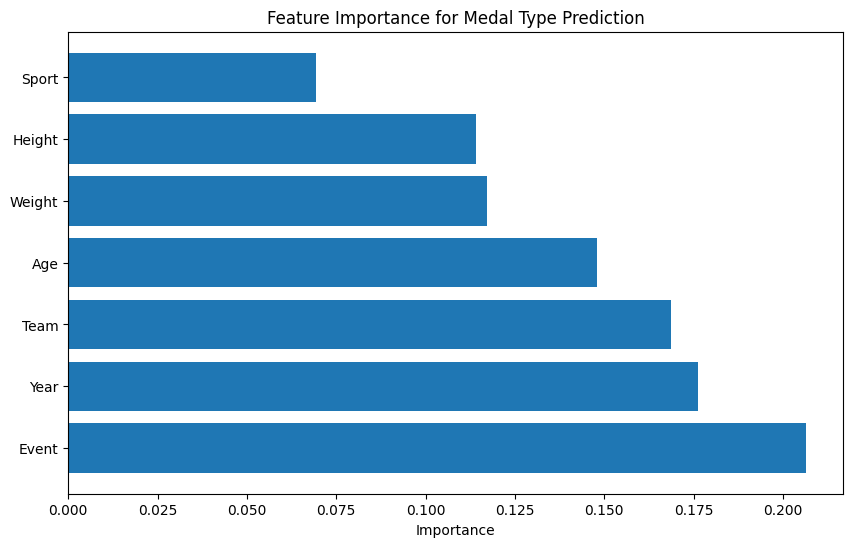

In [11]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Medal Type Prediction')
plt.show()

# **Medal Win Prediction**

In this section, we predict whether an athlete will win any medal (Gold, Silver, or Bronze) in the Olympics. This is a binary classification problem. Steps include:

1.   Creating a binary target column (won_medal): 1 if the athlete wins a medal, 0 otherwise.
2.   Using features like Age, Height, Weight, Sport, Event, Team, and Year.
3. Encoding categorical features with LabelEncoder.
4. Splitting data into training (80%) and testing (20%) sets.
Training a Random Forest Classifier.
5. Evaluating the model using ROC-AUC, precision, recall, and F1-score.

In [13]:
import pandas as pd

# Load the dataset
athlete_events = pd.read_csv('/content/athlete_events.csv')

# Display the first few rows
print(athlete_events.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [14]:
# Create a binary target column
athlete_events['won_medal'] = athlete_events['Medal'].notna().astype(int)

# Check the distribution of the target column
print(athlete_events['won_medal'].value_counts())

won_medal
0    231333
1     39783
Name: count, dtype: int64


In [15]:
# Select relevant features
features = ['Age', 'Height', 'Weight', 'Sport', 'Event', 'Team', 'Year']
target = 'won_medal'

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Sport', 'Event', 'Team']:
    athlete_events[col] = le.fit_transform(athlete_events[col])

# Display the prepared dataset
print(athlete_events[features + [target]].head())

    Age  Height  Weight  Sport  Event  Team  Year  won_medal
0  24.0   180.0    80.0      8    159   198  1992          0
1  23.0   170.0    60.0     32    397   198  2012          0
2  24.0     NaN     NaN     24    348   273  1920          0
3  34.0     NaN     NaN     61    709   278  1900          1
4  21.0   185.0    82.0     53    622   704  1988          0


In [16]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    athlete_events[features], athlete_events[target], test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (216892, 7)
Testing set shape: (54224, 7)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC-AUC Score: 0.7211892828516182

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     46290
           1       0.78      0.46      0.58      7934

    accuracy                           0.90     54224
   macro avg       0.85      0.72      0.76     54224
weighted avg       0.89      0.90      0.89     54224



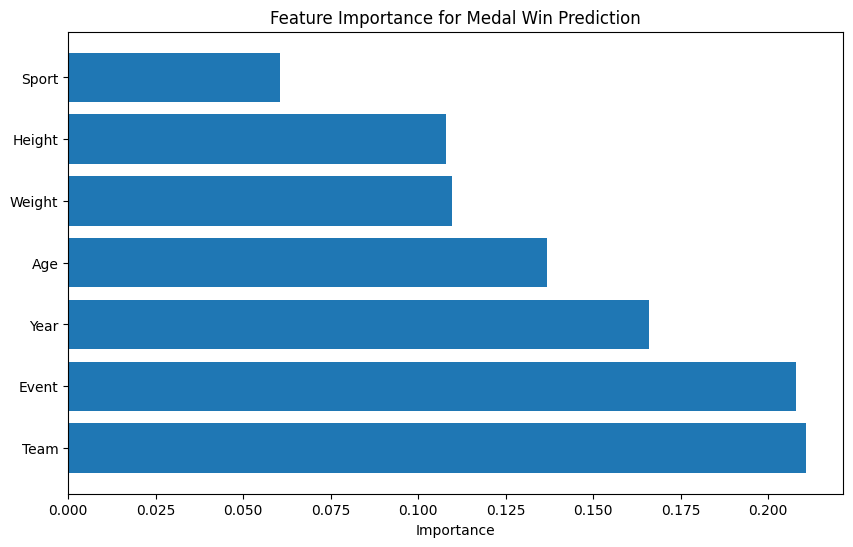

In [20]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Medal Win Prediction')
plt.show()